<a href="https://colab.research.google.com/github/AAP1992001/CODSOFT/blob/main/Sales_Predictions_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as stats

In [ ]:
df=pd.read_csv('advertising.csv')

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7d1e055e43d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d1e052e8d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d1e055e6290>],
 'medians': [<matplotlib.lines.Line2D at 0x7d1e052e8be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d1e052e9240>],
 'means': []}

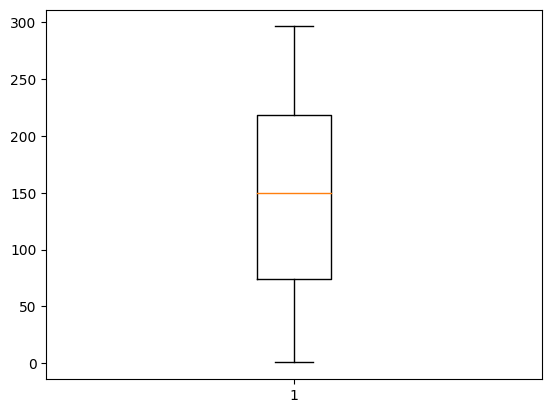

In [ ]:
plt.boxplot(df['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d1e0529c3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d1e053eaec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d1e0529e320>],
 'medians': [<matplotlib.lines.Line2D at 0x7d1e053e8be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d1e053e8c10>],
 'means': []}

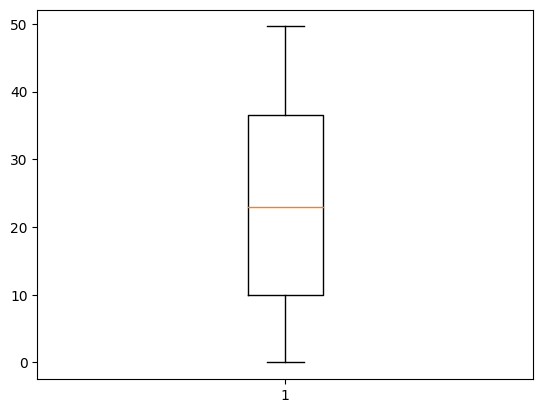

In [ ]:
plt.boxplot(df['Radio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d1e053b4e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7d1e053b5960>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d1e053b6050>],
 'medians': [<matplotlib.lines.Line2D at 0x7d1e053b77f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d1e053b5390>],
 'means': []}

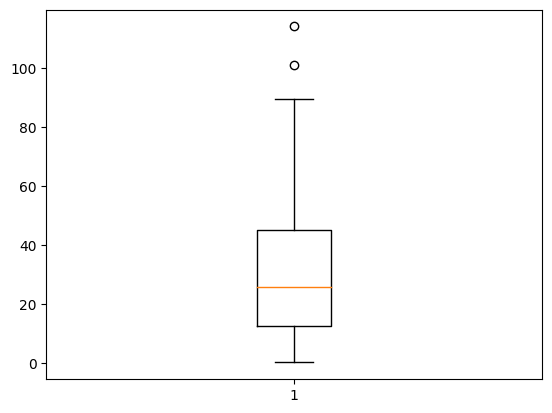

In [ ]:
plt.boxplot(df['Newspaper'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d1e02a3fc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7d1e02a3c310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d1e02a3cf40>],
 'medians': [<matplotlib.lines.Line2D at 0x7d1e02a3fcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d1e02a3fee0>],
 'means': []}

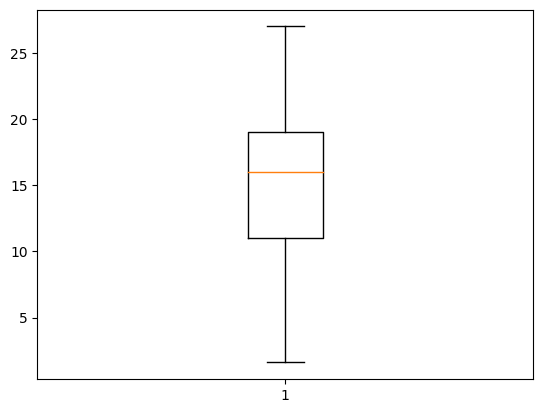

In [ ]:
plt.boxplot(df['Sales'])

In [ ]:
df[df['Newspaper'] >=100]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


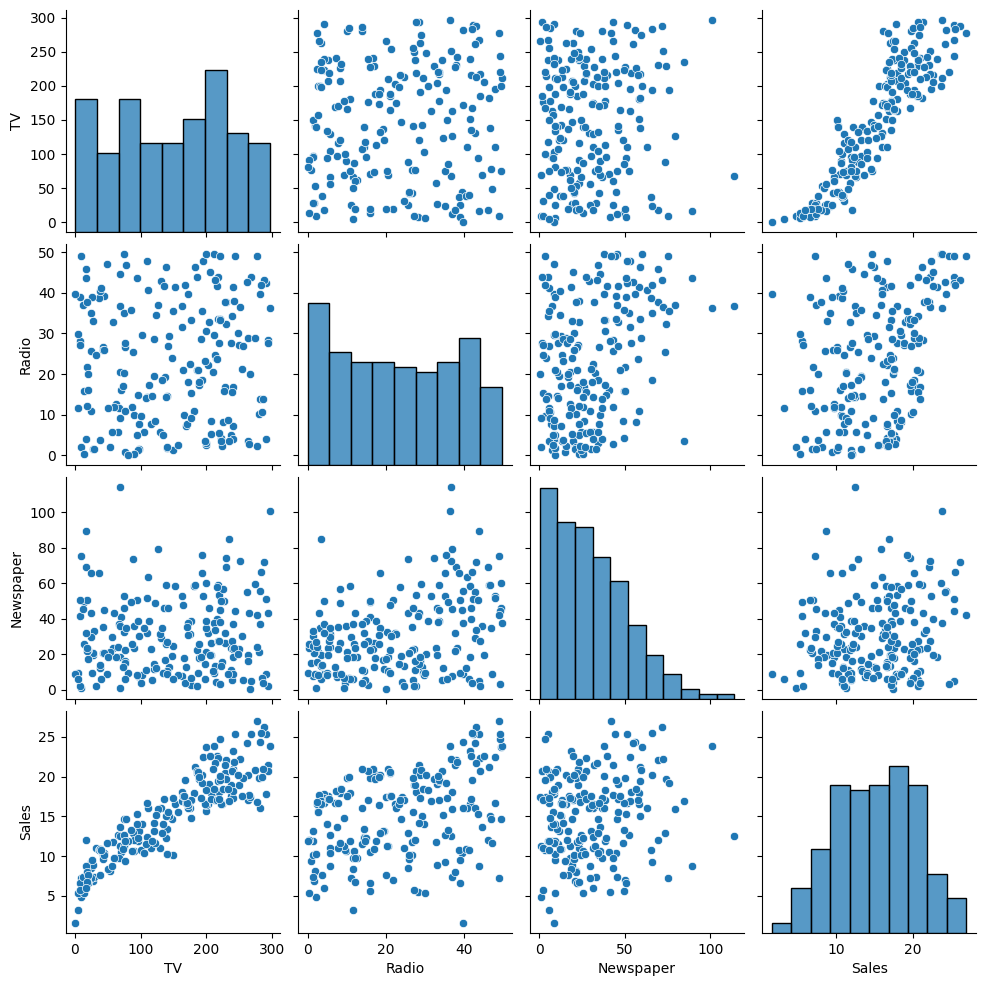

In [ ]:
sns.pairplot(df)

<Axes: >

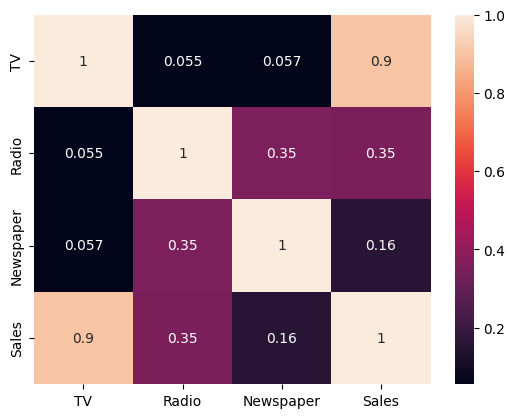

In [ ]:
sns.heatmap(df.corr(),annot= True)

In [ ]:
X= df[['TV','Newspaper','Radio']]
X

,TV,Newspaper,Radio
0,230.1,69.2,37.8
1,44.5,45.1,39.3
2,17.2,69.3,45.9
3,151.5,58.5,41.3
4,180.8,58.4,10.8
...,...,...,...
195,38.2,13.8,3.7
196,94.2,8.1,4.9
197,177.0,6.4,9.3
198,283.6,66.2,42.0


In [ ]:
y=df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
LR= LinearRegression()

In [ ]:
LR.fit(X,y)

LinearRegression()

In [ ]:
y_predict= LR.predict(X)
y_predict

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

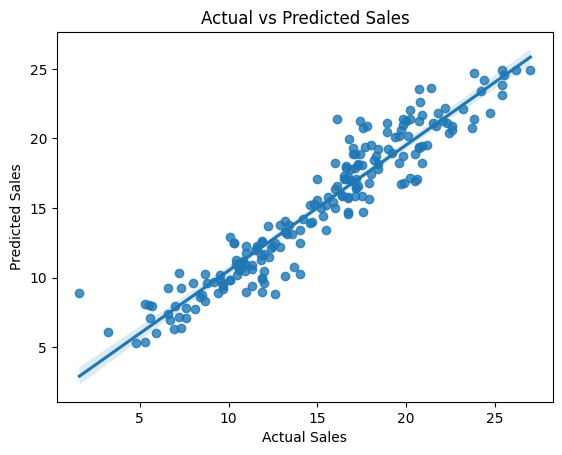

In [ ]:
sns.regplot(x=y, y=y_predict)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [ ]:
import sklearn.metrics as sm
sm.r2_score(y_true = y, y_pred=y_predict)

0.9025912899684558

In [ ]:
df1= pd.DataFrame(data=df)
df1['y_predict']= y_predict
df1['Residuals']= y-y_predict

In [ ]:
df1

,TV,Radio,Newspaper,Sales,y_predict,Residuals
0,230.1,37.8,69.2,22.1,21.220972,0.879028
1,44.5,39.3,45.1,10.4,11.268248,-0.868248
2,17.2,45.9,69.3,12.0,10.496209,1.503791
3,151.5,41.3,58.5,16.5,17.312447,-0.812447
4,180.8,10.8,58.4,17.9,15.644137,2.255863
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,7.105490,0.494510
196,94.2,4.9,8.1,14.0,10.280941,3.719059
197,177.0,9.3,6.4,14.8,15.259287,-0.459287
198,283.6,42.0,66.2,25.5,24.582220,0.917780


In [ ]:
Residuals= y-y_predict

In [ ]:
mean_Residuals = np.mean(Residuals)

In [ ]:
mean_Residuals

-2.6956215037898802e-15

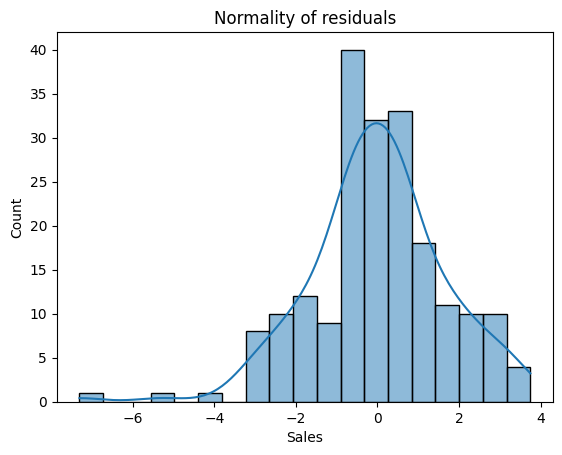

In [ ]:
p= sns.histplot(Residuals,kde = True)
p=plt.title('Normality of residuals')